# Tictactrip exercice

Because the columns in the given data are in english, I decided to write every comments in the same langage.

# Importing the dependencies

In order to load our data :

In [1]:
import pandas as pd
import csv
import numpy as np

To do some data visualization : 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

To convert our data

In [3]:
from datetime import datetime
import time

from math import radians, sin, cos, acos

# Opening the CSV Files

In [4]:
cities = pd.read_csv("cities.csv")
providers = pd.read_csv("providers.csv")
stations = pd.read_csv("stations.csv")
ticket_data = pd.read_csv("ticket_data.csv")

In [5]:
cities.columns

Index(['id', 'local_name', 'unique_name', 'latitude', 'longitude',
       'population'],
      dtype='object')

The columns population doesn't seem to give essential informations.
Therefore, I will remove it.

In [6]:
providers.columns

Index(['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi',
       'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

Here, we will just need the 'id' ,'company_id','name', 'fullname', 'transport_type' columns

In [7]:
stations.columns

Index(['id', 'unique_name', 'latitude', 'longitude'], dtype='object')

In [8]:
ticket_data.columns

Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')

To avoid issues in the merging, I will rename all the id's with a more specific name.

# Exploring the datas

### Exploring 'cities'

To avoid issues in the future merging, I renamed some columns with more specific names

In [9]:
cities= cities.rename(columns={"id":"id_cities"})

In [10]:
cities_null = cities.copy()
cities_null.isnull().sum()

id_cities         0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

We see that there are 7671 values missing in population and 1 value missing in unique_name.
Because population and local_name are not relevant for us, I removed them.

In [11]:
cities['unique_name'] = cities['unique_name'].fillna('unknow')

In [12]:
cities = cities.drop(columns = ['population','local_name'])


In [13]:
cities.head()

,id_cities,unique_name,latitude,longitude
0,5159,padua,45.406435,11.876761
1,76,barcelona,41.385064,2.173404
2,81,basel,47.593437,7.619812
3,259,erlangen,49.589674,11.011961
4,11979,balș,44.353354,24.095672


### Exploring providers

Looking for the missing values:

In [14]:
providers_null = providers.copy()
providers_null.isnull().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

We can see that there are :
14 missing values in 'provider_id'
3 missing values in 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle'

Because 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle' 
are not relevant for this exercice, I decided to remove them.


In [15]:
providers= providers.rename(columns={"id":"id_providers"})
providers = providers.drop(columns = ['has_wifi','has_plug', 'has_adjustable_seats', 'has_bicycle'])

In [16]:
providers.head(10)

,id_providers,company_id,provider_id,name,fullname,transport_type
0,9,1,NaN,ouibus,Ouibus,bus
1,10,2,NaN,deinbus,Deinbus.de,bus
2,11,3,NaN,infobus,Infobus,bus
3,12,4,NaN,studentAgency,Student Agency,bus
4,13,5,NaN,flixbus,Flixbus,bus
5,14,6,NaN,driivme,DriiveMe,car
6,15,8,NaN,alsa,Alsa,bus
7,16,9,NaN,distribusion,Distribusion,bus
8,17,9,31,expressbusMunchen,Expressbus Munchen,bus
9,18,9,33,berlinLinienBus,Berlin Linien Bus,bus


### Exploring stations

In [17]:
stations= stations.rename(columns={"id":"id_stations"})
stations.head()

,id_stations,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


### Exploring ticket_data

In [18]:
ticket_data= ticket_data.rename(columns={"id":"id_ticket_data"})
ticket_data.head()

,id_ticket_data,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


To interpret correctly our data, we need the time of different journeys.
Because departure_ts and arrival_ts are strings, we need to convert them:

### Transforming the string dates into dates

Transforming departure_ts

In [19]:
departure_ts_date =[]
for i in range(len(ticket_data['departure_ts'])):
    departure_ts_date.append(datetime.strptime(ticket_data['departure_ts'][i], '%Y-%m-%d %H:%M:%S+%f'))

Transforming arrival_ts

In [20]:
arrival_ts_date = []
for i in range(len(ticket_data['arrival_ts'])):
    arrival_ts_date.append(datetime.strptime(ticket_data['arrival_ts'][i], '%Y-%m-%d %H:%M:%S+%f'))

Drop the columns

In [21]:
ticket_data.drop('departure_ts', axis = 1)
ticket_data.drop('arrival_ts', axis = 1)

,id_ticket_data,company,o_station,d_station,departure_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


Recreating the columns with datetime

In [22]:
ticket_data['departure_ts'] = departure_ts_date
ticket_data['arrival_ts'] = arrival_ts_date

Checking if it's the right type

In [23]:
print(type(ticket_data['departure_ts'][0]), type(ticket_data['arrival_ts'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Merging ticket_data and cities with o_city

In [24]:
merge_data = pd.merge(ticket_data, cities, left_on= 'o_city', right_on='id_cities')

In [25]:
ticket_data.shape

(74168, 12)

ticket_data has 74 168 rows and 12 columns

In [26]:
cities.shape

(8040, 4)

cities has 8 040 rows and 5 columns

In [27]:
merge_data.shape

(74168, 16)

So it's perfectly normal that ticket_cities has 74 1618 rows and 17 (12 + 5) columns

### Now, we merge ticket_data with d_cities

In [28]:
merge_data= pd.merge(merge_data, cities, how = 'left', left_on= 'd_city', right_on = 'id_cities')

For better comprehension, we rename the columns:

In [29]:
merge_data = merge_data.rename(columns={"latitude_x" : "latitude_o","longitude_x" : "longitude_o",
                                                    "latitude_y" : "latitude_d", "longitude_y" : "longitude_d",
                                                   "id_cities_x" : "id_cities_o", "id_cities_y" : "id_cities_d",
                                                   "unique_name_x" : "cities_name_o", "unique_name_y" : "cities_name_d"})

### Merging with providers

In [30]:
merge_data = merge_data.merge(providers, how='left', left_on = 'company', right_on = 'company_id')

Again, for better understanding, I renamed the columns 
originally belonging to providers

In [31]:
merge_data = merge_data.rename(columns={'name': 'name_providers', 'fullname' : 'fullname_providers'})

### Merging with stations

First, we merge with o_station

In [32]:
merge_data = merge_data.merge(stations, how='left', left_on = 'o_station', right_on = 'id_stations')

Then, we merge with d_station

In [33]:
merge_data = merge_data.merge(stations, how='left', left_on = 'd_station', right_on = 'id_stations')

Finally, we rename the columns

In [34]:
merge_data = merge_data.rename(columns={"latitude_x" : "latitude_station_o","longitude_x" : "longitude_station_o",
                                                    "latitude_y" : "latitude_station_d", "longitude_y" : "longitude_station_d",
                                                   "id_stations_x" : "id_stations_o", "id_stations_y" : "id_stations_d",
                                                   "unique_name_x" : "station_name_o", "unique_name_y" : "station_name_d"})

## Our merged data set has those columns: 

In [35]:
merge_data.columns

Index(['id_ticket_data', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'id_cities_o', 'cities_name_o',
       'latitude_o', 'longitude_o', 'id_cities_d', 'cities_name_d',
       'latitude_d', 'longitude_d', 'id_providers', 'company_id',
       'provider_id', 'name_providers', 'fullname_providers', 'transport_type',
       'id_stations_o', 'station_name_o', 'latitude_station_o',
       'longitude_station_o', 'id_stations_d', 'station_name_d',
       'latitude_station_d', 'longitude_station_d'],
      dtype='object')

# Analyzing the ticket_data

## Cost of the tickets

Because in our data, the price is in cents, I converted it in dollars by dividing it by 100

### Minimum price

In [36]:
cheapest_ticket=merge_data['price_in_cents'].min()/100
print("The cheapest ticket costs:", cheapest_ticket , "$")

The cheapest ticket costs: 3.0 $


### Maximum price

In [37]:
expensive_ticket=merge_data['price_in_cents'].max()/100
print("The most expensive ticket costs:", expensive_ticket, "$")

The most expensive ticket costs: 385.5 $


### Average price

In [38]:
mean_ticket=round(merge_data['price_in_cents'].mean()/100)
print("The mean price for a ticket costs:",mean_ticket,"$")

The mean price for a ticket costs: 34 $


## Calculation of a journey time

In the dataset, the time of departure/arrival was a string.

Therefore, I implemented a method to convert a float into a string. It will be useful to display and interpret the journey time 

In [39]:
def time_format(time):
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    print("%d days %d hours %d minutes and %d seconds" % (day, hour, minutes, seconds))

### Creating a new column journey time in our data set

Because we need to know how long a journey can be,
I created a columns journey_time.

It will be helpful to compare the times of different journeys

In [40]:
merge_data['journey_time'] = round((pd.to_datetime(merge_data.arrival_ts) - 
                                pd.to_datetime(merge_data.departure_ts)).dt.total_seconds(),2)

Minimum journey time

In [41]:
merge_data[merge_data.journey_time ==  merge_data.journey_time.min()][['journey_time','cities_name_o', 'cities_name_d']].head(1)

,journey_time,cities_name_o,cities_name_d
111064,1200.0,paris,orleans


In [42]:
print("The minimum travel time for a trip is: ")
time_format(merge_data.journey_time.min())

The minimum travel time for a trip is: 
0 days 0 hours 20 minutes and 0 seconds


Maximum journey time

In [43]:
merge_data[merge_data.journey_time ==  merge_data.journey_time.max()][['journey_time','cities_name_o', 'cities_name_d']].head(1)

,journey_time,cities_name_o,cities_name_d
292761,1774260.0,bordeaux,lille


In [44]:
print("The maximum travel time for a trip is: ")
time_format(merge_data.journey_time.max())

The maximum travel time for a trip is: 
20 days 12 hours 51 minutes and 0 seconds


Average journey time

In [45]:
print("In average, the travel time for a trip is: ")
time_format(merge_data.journey_time.mean())

In average, the travel time for a trip is: 
0 days 13 hours 34 minutes and 14 seconds


### The average price in function of the transport type

Creating a dictionnary that will contain the transport type and the mean price of it

In [46]:
price_vs_transport = {}

Average price of a train ticket

In [47]:
price_vs_transport['train'] = round(float(merge_data[merge_data.transport_type ==  "train"]
                                        [['price_in_cents']].mean()/100),2)

Average price of a bus ticket

In [48]:
price_vs_transport['bus'] = round(float(merge_data[merge_data.transport_type ==  "bus"]
                                      [['price_in_cents']].mean()/100),2)

Average price of a covoit ticket

In [49]:
price_vs_transport['carpooling'] = round(float(merge_data[merge_data.transport_type ==  "carpooling"]
                                             [['price_in_cents']].mean()/100),2)

Displaying the result:

In [50]:
for transport_type, price in price_vs_transport.items():
    print("A", transport_type, 'ticket cost : ', price, '$')

A train ticket cost :  32.66 $
A bus ticket cost :  33.33 $
A carpooling ticket cost :  38.69 $


Displaying the results :

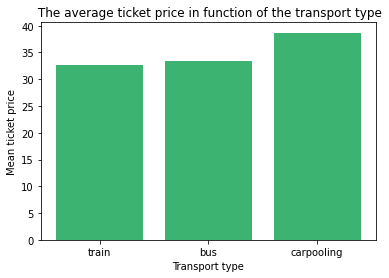

In [51]:
plt.bar(price_vs_transport.keys(), price_vs_transport.values(), color = 'mediumseagreen')
plt.xlabel("Transport type")
plt.ylabel("Mean ticket price")
plt.title(" The average ticket price in function of the transport type")
plt.show()


This indicate that, in average, a bus ticket price and a train ticket price is not so different.
However, if you choose to travel by carpooling, it will be cheaper.

### Time travel in function of the transport type

We create a dictionnary that will contain the transport type and the mean price of it

In [52]:
time_vs_transport = {}

Average time of a train journey

In [53]:
time_vs_transport['train'] = float(merge_data[merge_data.transport_type ==  "train"][['journey_time']].mean())

Average time of a bus journey

In [54]:
time_vs_transport['bus'] = float(merge_data[merge_data.transport_type ==  "bus"][['journey_time']].mean())

Average time of a carpooling journey

In [55]:
time_vs_transport['carpooling'] = float(merge_data[merge_data.transport_type ==  "carpooling"][['journey_time']].mean())

Displaying the results

In [56]:
for transport_type, time in time_vs_transport.items():
    print("A", transport_type, 'is in average')
    print(time_format(time))

A train is in average
0 days 12 hours 42 minutes and 13 seconds
None
A bus is in average
0 days 14 hours 14 minutes and 50 seconds
None
A carpooling is in average
0 days 11 hours 20 minutes and 0 seconds
None


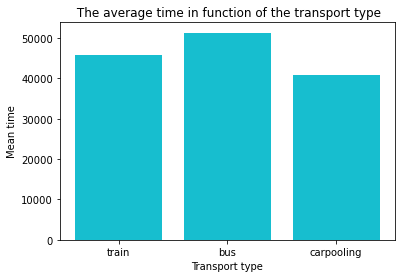

In [57]:
plt.bar(time_vs_transport.keys(), time_vs_transport.values(), color = 'tab:cyan')
plt.xlabel("Transport type")
plt.ylabel("Mean time")
plt.title(" The average time in function of the transport type")
plt.show()

This histogram validates that, in average, carpooling as the lower travel time.

# Now, let's look how the price and the time of travel vary in function of the distances 

## Creating a column distance 

Creating a method to calculate distances between two cities 

In [58]:
def distance(o_lat, o_lon, d_lat, d_lon):
    o_lat = radians(o_lat)
    o_lon = radians(o_lon)
    d_lat = radians(d_lat)
    d_lon = radians(d_lon)
    dist = 6371.01 * acos(sin(o_lat)*sin(d_lat) + cos(o_lat)*cos(d_lat)*cos(o_lon - d_lon))
    return dist

Creating a method to display the distance

In [59]:
def distance_format(dist):
       print("The distance is %.2fkm." % dist)

Applying this function to our data

In [60]:
distance_km = []
for i in range(len(merge_data['latitude_o'])):
    distance_km.append(distance(merge_data['latitude_o'][i],
                                merge_data['longitude_o'][i],
                                merge_data['latitude_d'][i],
                                merge_data['longitude_d'][i]))

In [61]:
merge_data['distance_km'] = distance_km

## Average price in function of the distance

We create a dictionnary that will contain the distance and the mean price of it

In [62]:
price_vs_distance= {}

Average price when the distance of a trip is between 0 and 200 km

In [63]:
price_vs_distance['0-200 km'] = round(float(merge_data[(merge_data['distance_km'] >=  0) 
                                                & (merge_data.distance_km <= 200)][['price_in_cents']].mean())/100,2)

Average price when the distance of a trip is between 201 and 800km

In [64]:
price_vs_distance['201-800 km'] = round(float(merge_data[(merge_data['distance_km'] >=  201) 
                                                   & (merge_data.distance_km <= 800)][['price_in_cents']].mean())/100,2)

Average price when the distance of a trip is between 800 and 2000km

In [65]:
price_vs_distance['800-2000 km'] = round(float(merge_data[(merge_data['distance_km'] >=  800) 
                                             & (merge_data.distance_km <= 2000)][['price_in_cents']].mean())/100,2)

Average price when the distance of a trip is superior than 2000 km

In [66]:
print(round(float(merge_data[merge_data['distance_km'] > 2000][['price_in_cents']].mean())/100,2))

nan


It seems like there isn't a distance superior than 2000 in our dataset.

Displaying the result

In [67]:
for distance, price in price_vs_distance.items():
    print("A trip with a distance of", distance, 'cost', price, '$ in average.')

A trip with a distance of 0-200 km cost 20.23 $ in average.
A trip with a distance of 201-800 km cost 34.31 $ in average.
A trip with a distance of 800-2000 km cost 62.1 $ in average.


Let's visualize how the price varies in function of the distance:

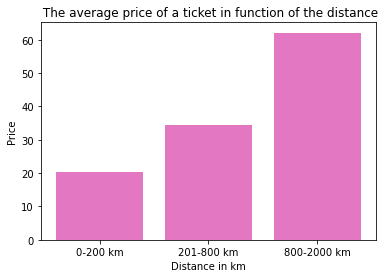

In [68]:
plt.bar(price_vs_distance.keys(), price_vs_distance.values(), color = 'tab:pink')
plt.xlabel("Distance in km")
plt.ylabel("Price")
plt.title(" The average price of a ticket in function of the distance")
plt.show()

As we saw previously, when the distance is higher, the price of a ticket increase in average.

## Average time travel in function of the distance

We create a dictionnary that will contain the distance and the mean time travel

In [69]:
time_vs_distance ={}

Average price when the distance of a trip is between 0 and 200 km

In [70]:
time_vs_distance['0-200 km'] = float(merge_data[(merge_data['distance_km'] >=  0) 
                                                & (merge_data.distance_km <= 200)][['journey_time']].mean())

Average price when the distance of a trip is between 201 and 800 km

In [71]:
time_vs_distance['201-800 km'] = float(merge_data[(merge_data['distance_km'] >=  201) 
                                                & (merge_data.distance_km <= 800)][['journey_time']].mean())

Average price when the distance of a trip is between 801 and 2000 km

In [72]:
time_vs_distance['800-2000 km'] = float(merge_data[(merge_data['distance_km'] >=  801) 
                                                & (merge_data.distance_km <= 2000)][['journey_time']].mean())

Average price when the distance of a trip is superior than 2000 km

In [73]:
print(float(merge_data[merge_data['distance_km'] > 2000][['journey_time']].mean()))

nan


Again, it seems like there are no distances superior than 2000 km in our dataset

Displaying the results

In [74]:
for distance, time in time_vs_distance.items():
    print('A trip with a distance of', distance, 'last in average')
    print(time_format(time))

A trip with a distance of 0-200 km last in average
0 days 8 hours 54 minutes and 37 seconds
None
A trip with a distance of 201-800 km last in average
0 days 13 hours 26 minutes and 26 seconds
None
A trip with a distance of 800-2000 km last in average
1 days 0 hours 22 minutes and 12 seconds
None


Let's visualize how the price varies in function of the distance:

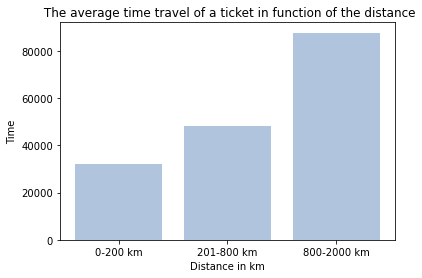

In [75]:
plt.bar(time_vs_distance.keys(), time_vs_distance.values(), color = 'lightsteelblue')
plt.xlabel("Distance in km")
plt.ylabel("Time")
plt.title(" The average time travel of a ticket in function of the distance")
plt.show()

Here, the travel time is increasing with the distance, which is coherent. 

   #                       ----------- Plotting the data on a map -----------

### Installing the dependencies

In [76]:
#!pip install descartes
import descartes

#!pip install geopandas
#conda install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

### Loading the map that we will use 

In [77]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

### Creating GeoDataFrame

In order to have the location of our cities and stations on a map, we need to create GeoDataFrame. These dataframe will contain values such as the name of a city and geometry points.

In [78]:
crs = {'init': "EPSG:4326"}

geometry_cities= [Point(xy) for xy in zip(cities['longitude'],cities['latitude'])]

geometry_stations= [Point(xy) for xy in zip (merge_data['longitude_station_d'], merge_data['latitude_station_d'])]

In [79]:
gpd_cities = gpd.GeoDataFrame(cities,
                          crs = crs,
                         geometry = geometry_cities)

gpd_stations = gpd.GeoDataFrame(merge_data,
                          crs = crs,
                         geometry = geometry_stations)

### Displaying the possibilities on a map

In [80]:
print("Hello, you can start your trip from here:\n\n\n")
print(gpd_stations.cities_name_o.unique())

Hello, you can start your trip from here:



['orleans' 'paris' 'metz' 'la-rochelle' 'sain-bel' 'dijon' 'geneve'
 'montauban' 'toulon' 'arras' 'bordeaux' 'lille' 'chalons-en-champagne'
 'les-sables-dolonne' 'valenciennes' 'nancy' 'aeroport-paris-vatry-'
 'lyon' 'rouen' 'amiens' 'boulogne-sur-mer' 'pau' 'avignon' 'marseille'
 'limoges' 'rennes' 'toulouse' 'annecy' 'caen' 'bruz' 'saint-brieuc'
 'clermont-ferrand' 'besancon' 'biarritz' 'aix-en-provence'
 'lezignan-corbieres' 'nantes' 'bruxelles' 'deauville' 'dole-choisey'
 'massy' 'angers' 'pamiers' 'le-touquet-paris-plage' 'guingamp' 'lorient'
 'saint-dizier' 'lens' 'tours' 'chateauroux' 'strasbourg' 'bourges'
 'angouleme' 'soissons' 'aubagne' 'douai' 'nice' 'saint-priest' 'rodez'
 'tourcoing' 'saint-raphael' 'frejus' 'beauvais-aeroport-paris' 'beziers'
 'cannes' 'albias' 'grenoble' 'torino' 'montelimar' 'le-mans' 'quimper'
 'agen' 'carcassonne' 'brive-la-gaillarde' 'poitiers'
 'saint-maixent-lecole' 'savona' 'mulhouse' 'venezia' 'troyes

### Asking the user where do he want to go and checking if this city is available:

Creating a method that will check if the city asked is in our database

In [81]:
def IsItPossible(station, condition):
    valid = False
    while valid != True:
        if station in condition:
            valid = True
            print("Here we go!")
        else:
            station = input("This station is not available \n\nPlease try again : ")
    return(station)

The user can see his trip:

In [82]:
origin = input('Where do you want to start your journey ? ').lower()

origin = IsItPossible(origin, gpd_stations.cities_name_o.unique())

Where do you want to start your journey ? gdthf
This station is not available 

Please try again : annecy
Here we go!


From annecy, you can go there:
['lyon' 'lille' 'marseille' 'saint-quentin-fallavier' 'nantes' 'milano'
 'chamonix' 'brive-la-gaillarde']


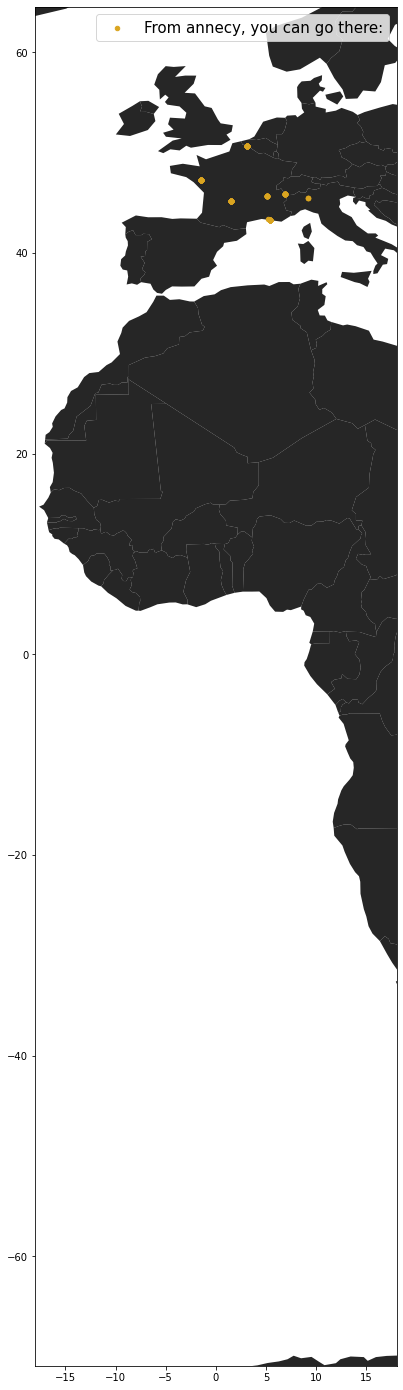

In [83]:
print("From " + origin + ", you can go there:")
possibilities = gpd_stations[gpd_stations.cities_name_o == origin][["cities_name_d"]]
print(possibilities.cities_name_d.unique())

fig,ax = plt.subplots(figsize =(25,25))
world.plot(ax =ax,alpha = 0.85,color = 'black')
ax.margins(x=-0.45 , y=-0.11)

gpd_stations[gpd_stations.cities_name_o == origin][["geometry"]].plot(ax =ax, markersize = 20, color = 'goldenrod' , marker = 'o', 
                                                        label = "From " + origin + ", you can go there:")
plt.legend(prop = {'size' : 15})
plt.show()

In [84]:
destination = input('Where do you want to go ? ').lower()
destination = IsItPossible(destination, possibilities.cities_name_d.unique())

Where do you want to go ? marseille
Here we go!


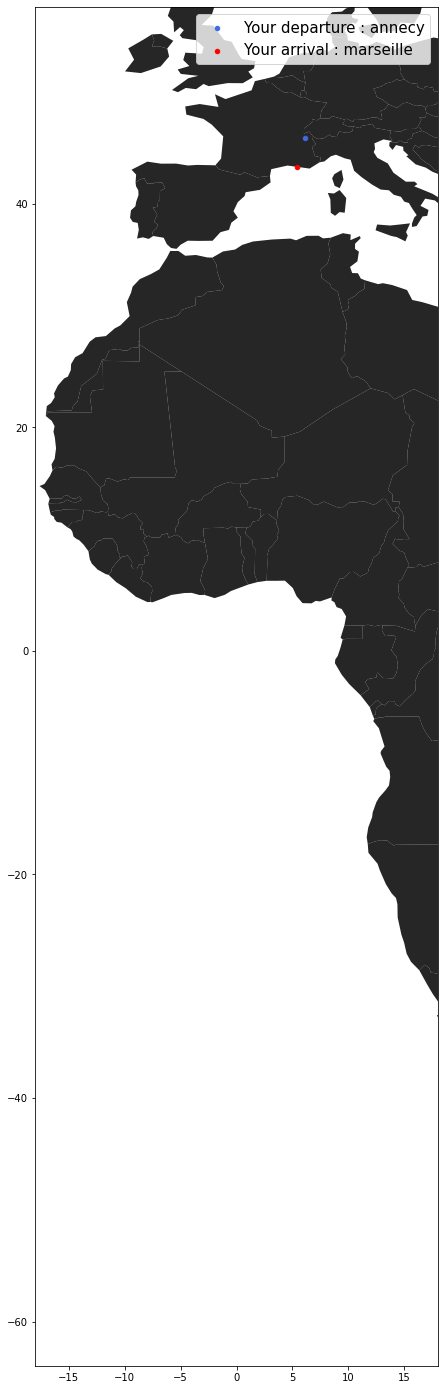

In [86]:
fig,ax = plt.subplots(figsize =(25,25))
world.plot(ax =ax,alpha = 0.85,color = 'black')
ax.margins(x=-0.45, y=-0.15)

gpd_cities[gpd_cities.unique_name == origin][['geometry']].plot(ax =ax, markersize = 20, color = 'royalblue' , marker = 'o', 
                                                        label = 'Your departure : '+origin)

gpd_cities[gpd_cities.unique_name == destination][['geometry']].plot(ax =ax, markersize = 20, color = 'red' , marker = 'o',
                                                             label = 'Your arrival : '+destination)
                                        
plt.legend(prop = {'size' : 15})
plt.show()
